In [21]:
import numpy as np
import tensorcircuit as tc
import matplotlib.pyplot as plt

from tensorcircuit.applications.optimization import QUBO_QAOA
from tensorcircuit.templates.conversions import QUBO_to_Ising
from tensorcircuit.templates.ansatz import QAOA_ansatz_for_Ising

from supply import print_result_cost, all_quantum_states

K = tc.set_backend("tensorflow")

from supply import integer_QAOA_transformation

The QUBO problem can be described as find the minimum value of

$$ x^TQx = x^TI^TQIx $$

where $M$ is the transformation matrix and $M^{-1}$ is its inverse matrix

$$ M^{-1}M = I \text{(with the same dimension as Q)} $$

Thuse we can say

$$ x^TQx = (M^{-1}x)^TM^TQM(M^{-1}x) $$

Consider integer states $x$ and binary states $X$,

It is not necessarily true that

$$ X = M^{-1}x $$

because the elements in $M^{-1}x$ could be floats.

But

$$ X \in M^{-1}x $$

In [22]:
Q = np.array([[-5, -1, 2], [-1, 6, 0], [2, 0, -2]])
integers = [6, 2, 7]

In [23]:
matrix = integer_QAOA_transformation(integers) # transformation matrix
transformed_Q = np.dot(matrix.T, np.dot(Q, matrix))

In [24]:
matrix

array([[1, 1, 2, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 2, 4]])

state: [6, 1, 0] 
cost: -186


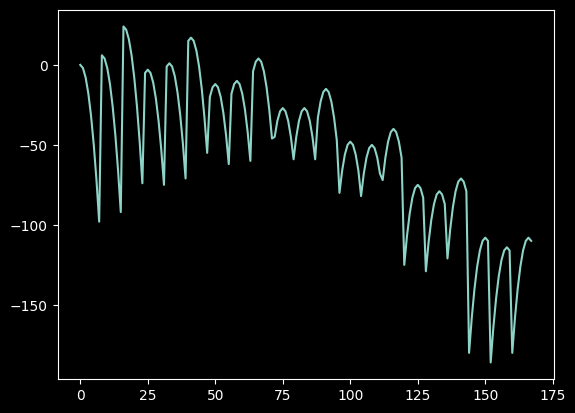

In [25]:
all_states = [] # all feasible states
costs = [] # the correspoding costs
for x1 in range(integers[0]+1):
    for x2 in range(integers[1]+1):
        for x3 in range(integers[2]+1):
            all_states.append([x1, x2, x3])
for state in all_states:
    costs.append(np.dot(state, np.dot(Q, state)))
plt.plot(costs)
print("state:", all_states[np.argmin(costs)], "\ncost:", np.min(costs))

In [26]:
params = QUBO_QAOA(transformed_Q, 5, 1500)

In [27]:
pauli_terms, weights, _ = QUBO_to_Ising(transformed_Q)
c_final = QAOA_ansatz_for_Ising(
    params, 5, pauli_terms, weights
)
print_result_cost(c_final, transformed_Q, wrap=True)


-------------------------------------
    selection	  |	  cost
-------------------------------------
 111101000	  |	-186.0000
 111110000	  |	-186.0000
 111100000	  |	-180.0000
 111111000	  |	-180.0000
 111101100	  |	-164.0000
 111110100	  |	-164.0000
 111100100	  |	-158.0000
 111111100	  |	-158.0000
-------------------------------------


In [28]:
dec = []
for i in '111101000':
    dec.append(int(i))
np.dot(matrix, np.transpose([dec]))

array([[6],
       [1],
       [0]])